<a href="https://colab.research.google.com/github/RAHAMNIabdelkaderseifelislem/PlantDiseaseDetection_usingCNN/blob/main/PlantDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
!pip install kaggle

In [7]:
!mkdir ~/.kaggle
!cp /kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! kaggle datasets download sadmansakibmahi/plant-disease-expert

100% 6.42G/6.42G [01:21<00:00, 115MB/s]
100% 6.42G/6.42G [01:21<00:00, 84.8MB/s]


In [9]:
! pip install tensorflow

In [10]:
! unzip /content/plant-disease-expert.zip

Streaming output truncated to the last 5000 lines.
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2943.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2944.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2945.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2946.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2947.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2948.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2949.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy295.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2950.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2951.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2952.jpg  
  inflating: Im

In [13]:
! pip install tensorflow.keras

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [12]:
base_dir = "/content/Image Data base/Image Data base"

# Importing libraries

In [33]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load and preprocess the dataset

In [34]:
data_dir = base_dir
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


## Load and preprocess images from the dataset

In [39]:
image_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Set class_mode to 'binary'
    shuffle=False  # Disable shuffling to maintain order
)

Found 199665 images belonging to 58 classes.


## Split the dataset into training and testing sets

In [40]:
X, y = image_data.next()  # Get the image data and labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Create a CNN model architecture

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model on the dataset

In [43]:
epochs = 5
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)


Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 4.0829 - accuracy: 0.0000e+00 - val_loss: 0.0916 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.1995 - accuracy: 1.0000 - val_loss: 4.8535e-06 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 1.0818e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 1s 961ms/step - loss: 1.9073e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 1s 943ms/step - loss: 2.3842e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


# Evaluate the model's performance

In [44]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0000, Test Accuracy: 1.0000


# Plot the metrics


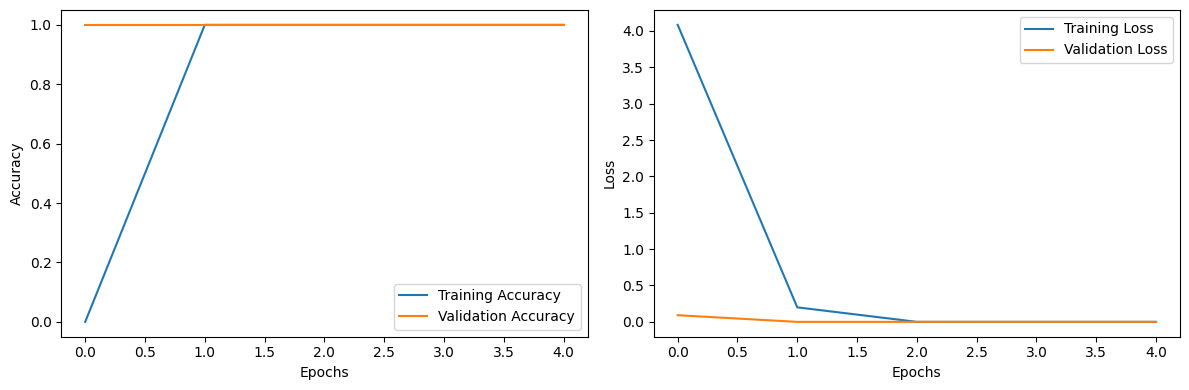

In [46]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Plot training and validation accuracy
    ax[0].plot(history.history['accuracy'], label='Training Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Plot training and validation loss
    ax[1].plot(history.history['loss'], label='Training Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history)